In [126]:
mydata <- read.csv("./PK_data/data.csv", sep = ',')
library(dplyr)
mydata$time <-as.POSIXct(mydata[,1], format="%Y-%m-%d %H:%M:%S")
mydata$idle <- as.character(mydata[,2])
mydata$mem <- as.character(mydata[,3])
myvar <- c("time","idle","mem")
myvar_idle <- c("time","idle")
myvar_mem <- c("time","mem")
data <-mydata[myvar]
idle_data <-mydata[myvar_idle]
idle_mem <- mydata[myvar_mem]

# require(zoo)
data.zoo <- with(data, zoo(idle, order.by = time))


require(xts)
tsdata <- as.xts(data55.zoo)
tsdata <- as.xts(data54.zoo)

data55.xts <- xts(data55$V3, data55$time)
means.xts <- period.apply(data55.xts, endpoints(data55.xts, "mins", k=60), mean)
means.rounded <- align.time(means.xts, 60)


#for vmy2954
#data54.xts <- xts(data54$V3, data54$time)
#means54.xts <- period.apply(data54.xts, endpoints(data54.xts, "mins", k=60), mean)
#means54.rounded <- align.time(means54.xts, 60)

library(tseries)

cpu <-means.rounded



cpudiff <- diff(cpu, differences=1)
cpudiff <- na.omit(cpudiff)
cpu54 <- means54.rounded
adf = adf.test(na.omit(cpudiff))
adf

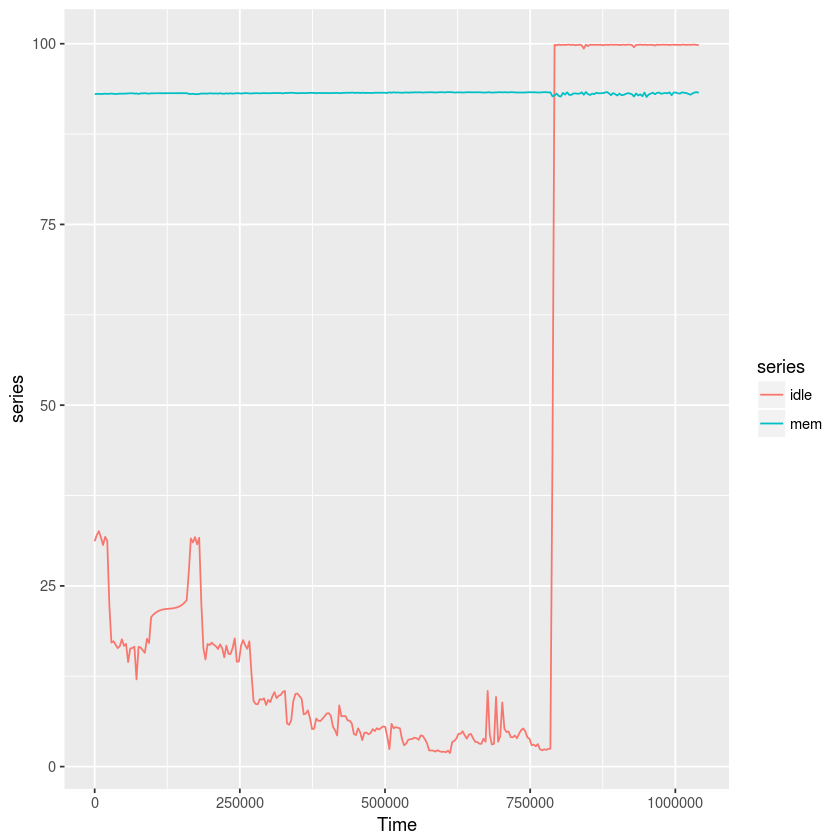

In [127]:
library(xts)
library(ggplot2)
series <- xts(data[,-1], order.by=as.POSIXct(mydata[,1], "%Y-%m-%d %H:%M:%S"))
series <- as.ts(series)
autoplot(series)

In [128]:
#Need to convert data into numeric format to do any VAR calculations
data['idle'] <-as.integer(as.character(data$idle))
data['mem'] <-as.integer(as.character(data$mem))
#str(data)
write.csv(data )
mem[which(is.nan(mem))] = NA
#mem[which(is.nan(mem))] = NA
mem[which(mem==Inf)] = NA
#Memo = diff(mem)
#IM = cbind(Idl,Memo)

"","time","idle","mem"
"1",2018-03-14 10:00:00,31,93
"2",2018-03-14 11:00:00,32,93
"3",2018-03-14 12:00:00,32,93
"4",2018-03-14 13:00:00,31,93
"5",2018-03-14 14:00:00,30,93
"6",2018-03-14 15:00:00,31,93
"7",2018-03-14 16:00:00,31,93
"8",2018-03-14 17:00:00,22,93
"9",2018-03-14 18:00:00,17,93
"10",2018-03-14 19:00:00,17,93
"11",2018-03-14 20:00:00,16,93
"12",2018-03-14 21:00:00,16,93
"13",2018-03-14 22:00:00,16,93
"14",2018-03-14 23:00:00,17,93
"15",2018-03-15 00:00:00,16,93
"16",2018-03-15 01:00:00,16,93
"17",2018-03-15 02:00:00,14,93
"18",2018-03-15 03:00:00,16,93
"19",2018-03-15 04:00:00,16,93
"20",2018-03-15 05:00:00,16,93
"21",2018-03-15 06:00:00,12,93
"22",2018-03-15 07:00:00,16,93
"23",2018-03-15 08:00:00,16,93
"24",2018-03-15 09:00:00,16,93
"25",2018-03-15 10:00:00,15,93
"26",2018-03-15 11:00:00,17,93
"27",2018-03-15 12:00:00,17,93
"28",2018-03-15 13:00:00,20,93
"29",2018-03-15 14:00:00,21,93
"30",2018-03-15 15:00:00,21,93
"31",2018-03-15 16:00:00,21,93
"32",2018-03-15 17:00:00,

In [145]:

var <- VAR(series, p = 3, type = "none")
plot(var)
#summary(var)
#head(series)

Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in plot.window(...): need finite 'ylim' values


In [130]:
library(xts)
library(ggplot2)
seriesI<- xts(data[,-1], order.by=as.POSIXct(data[,1], "%Y-%m-%d %H:%M:%S "))
Iseries <- as.ts(seriesI, frequency = 8760)
autoplot(Iseries)

ERROR: Error in ts(coredata(x), frequency = frequency(x), ...): formal argument "frequency" matched by multiple actual arguments


In [41]:
library(forecast)

#vmy 2955#
fit_arima <- auto.arima(series,stepwise = FALSE, approximation = FALSE,trace = FALSE)
fit_nn <-nnetar(series, decay = 0.005,repeats = 40)
fit_ets <- ets(series)

ERROR: Error in auto.arima(series, stepwise = FALSE, approximation = FALSE, trace = FALSE): auto.arima can only handle univariate time series


In [42]:
fcst_nn <- forecast(fit_nn,PI = TRUE,h = 20)
fcst_arima <- forecast(fit_arima,PI = TRUE,h = 20)
fcst_ets <- forecast(fit_ets,h=5)
fcstdf <- as.data.frame(forecast(fit_nn,PI = TRUE))












#vmy2954
#fit_arima54 <- auto.arima(cpu54,stepwise = FALSE, approximation = FALSE,trace = FALSE)
#fit_nn54 <-nnetar(cpu54, decay = 0.005,repeats = 20)
#fit3 <- arfima(cpu,drange = c(0, 0.8),estim = c("mle"))
#fcst54 <- forecast(fit_nn54,PI = FALSE,h = 60)
#fcstdf54 <- as.data.frame(forecast(fit_nn54,PI = TRUE))

ERROR: Error in forecast(fit_nn, PI = TRUE, h = 20): object 'fit_nn' not found


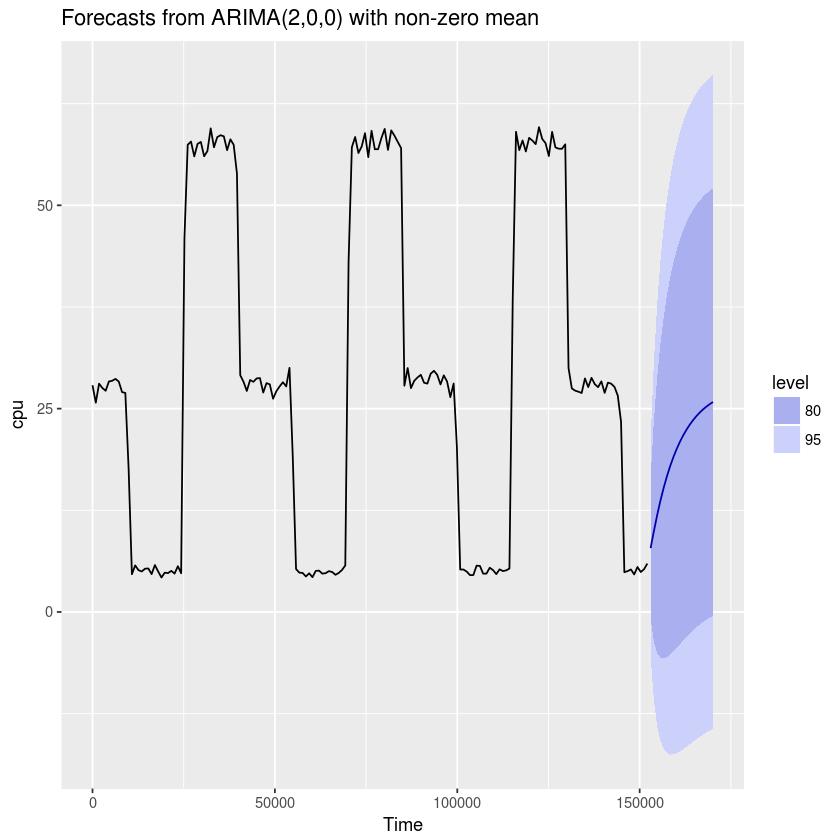

In [13]:
library(ggplot2)
#autoplot(fcst54)
autoplot(fcst_arima)


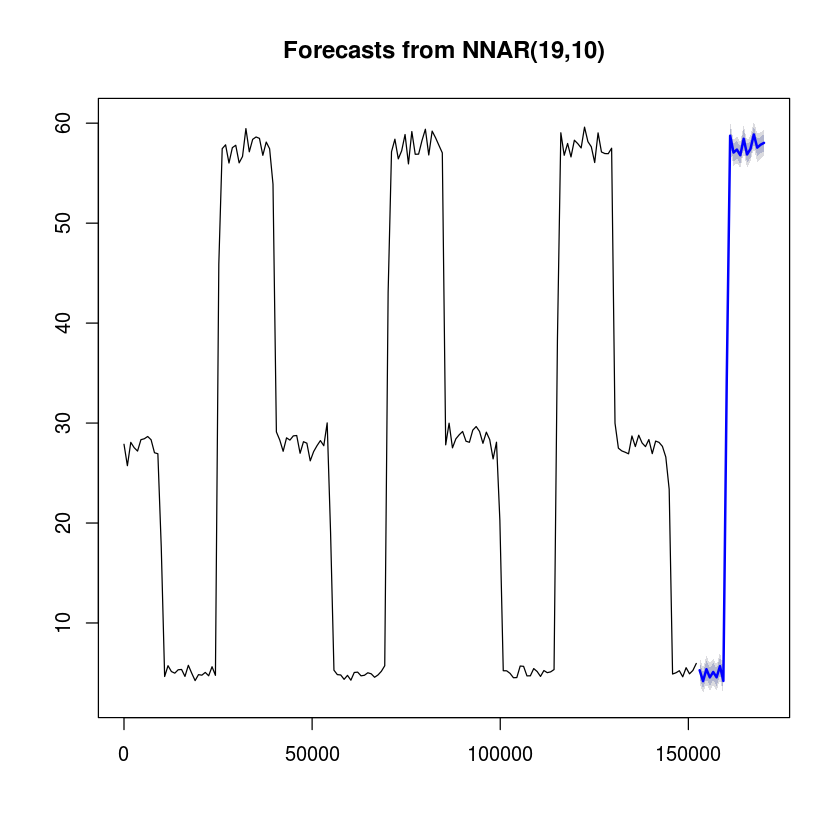

In [14]:
plot(fcst_nn)

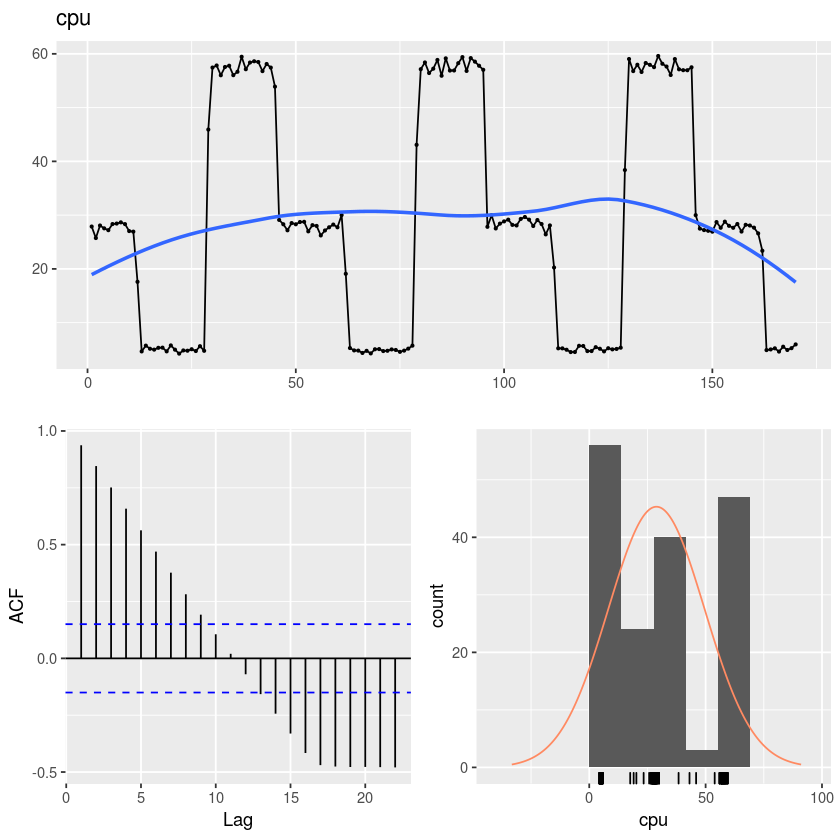

In [15]:
ggtsdisplay(cpu, plot.type="histogram",points = TRUE,smooth = TRUE)

In [16]:
summary(fcst_arima)


Forecast method: ARIMA(2,0,0) with non-zero mean

Model Information:
Series: cpu 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     mean
      1.2011  -0.2786  27.9036
s.e.  0.0732   0.0735   6.3629

sigma^2 estimated as 46.09:  log likelihood=-566.46
AIC=1140.92   AICc=1141.16   BIC=1153.46

Error measures:
                       ME     RMSE      MAE       MPE     MAPE     MASE
Training set -0.006245181 6.728782 3.295529 -14.86547 24.43874 0.114137
                    ACF1
Training set 0.004469035

Forecasts:
       Point Forecast      Lo 80    Hi 80      Lo 95    Hi 95
153001       7.848085 -0.8523051 16.54848  -5.458014 21.15418
153901       9.931457 -3.6661769 23.52909 -10.864330 30.72724
154801      11.905335 -5.0490858 28.85976 -14.024214 37.83488
155701      13.695666 -5.6188463 33.01018 -15.843332 43.23466
156601      15.296051 -5.7226890 36.31479 -16.849338 47.44144
157501      16.719433 -5.5573414 38.99621 -17.349953 50.78882
158401      17.983142 -5.

In [17]:
summary(fcst_nn)


Forecast method: NNAR(19,10)

Model Information:

Average of 40 networks, each of which is
a 19-10-1 network with 211 weights
options were - linear output units  decay=0.005

Error measures:
                       ME      RMSE      MAE       MPE     MAPE       MASE
Training set 0.0001980015 0.6621425 0.505052 -0.317959 3.259989 0.01749192
                   ACF1
Training set -0.0713729

Forecasts:
       Point Forecast     Lo 80     Hi 80     Lo 95     Hi 95
153001       5.272181  4.421318  6.089195  3.976915  6.496336
153901       4.180617  3.412881  5.025883  2.993414  5.540717
154801       5.379058  4.452316  6.258878  3.912158  6.692242
155701       4.556338  3.722248  5.459815  3.208391  5.961118
156601       5.099455  4.266021  6.011196  3.821640  6.420979
157501       4.564145  3.726398  5.431454  3.242735  5.803148
158401       5.684622  4.793463  6.583721  4.320495  7.029857
159301       4.201757  3.355508  5.115094  2.829009  5.512988
160201      34.342499 33.172958 35.40300

In [18]:
accuracy(fit_nn)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.0001980015,0.6621425,0.505052,-0.317959,3.259989,0.01749192,-0.0713729


In [19]:
accuracy(fit_arima)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.006245181,6.728782,3.295529,-14.86547,24.43874,0.114137,0.004469035


In [203]:
dm.test(residuals(fit_arima), residuals(fit_nn),h=5)


	Diebold-Mariano Test

data:  residuals(fit_arima)residuals(fit_nn)
DM = 2.7272, Forecast horizon = 5, Loss function power = 2, p-value =
0.007079
alternative hypothesis: two.sided


In [ ]:
ts_cpu <- as.ts(cpu)
mlp.fit <- mlp(ts_cpu)

In [ ]:
ts_cpu <- as.ts(cpu)

In [204]:
cpu

                         [,1]
2018-03-06 15:00:00 27.877789
2018-03-06 16:00:00 25.737064
2018-03-06 17:00:00 28.069939
2018-03-06 18:00:00 27.539540
2018-03-06 19:00:00 27.198838
2018-03-06 20:00:00 28.338160
2018-03-06 21:00:00 28.430520
2018-03-06 22:00:00 28.656933
2018-03-06 23:00:00 28.329602
2018-03-07 00:00:00 27.033374
2018-03-07 01:00:00 26.931534
2018-03-07 02:00:00 17.598899
2018-03-07 03:00:00  4.647485
2018-03-07 04:00:00  5.725736
2018-03-07 05:00:00  5.143221
2018-03-07 06:00:00  4.980429
2018-03-07 07:00:00  5.319235
2018-03-07 08:00:00  5.351012
2018-03-07 09:00:00  4.655767
2018-03-07 10:00:00  5.765368
2018-03-07 11:00:00  4.975920
2018-03-07 12:00:00  4.237278
2018-03-07 13:00:00  4.831534
2018-03-07 14:00:00  4.780184
2018-03-07 15:00:00  5.054847
2018-03-07 16:00:00  4.719601
2018-03-07 17:00:00  5.623773
2018-03-07 18:00:00  4.762385
2018-03-07 19:00:00 45.914479
2018-03-07 20:00:00 57.452294
2018-03-07 21:00:00 57.834202
2018-03-07 22:00:00 56.015443
2018-03-07

In [ ]:
%python3
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd



trace_high = go.Scatter(
    x=df.Date,
    y=df['AAPL.High'],
    name = "AAPL High",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_low = go.Scatter(
    x=df.Date,
    y=df['AAPL.Low'],
    name = "AAPL Low",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Time Series with Rangeslider")

In [205]:
fcstdf

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
119521,6.991289,-1.007593e+00,15.04516,-5.219917,20.02592
120241,7.864293,-1.038323e+00,17.58110,-5.401000,22.82882
120961,8.202119,-4.392060e-01,18.64195,-4.557246,24.91970
121681,8.328816,-2.177805e-01,18.67400,-5.075346,25.48742
122401,8.374957,7.552546e-02,18.77085,-5.136791,26.36916
123121,8.391451,-3.492649e-02,19.58447,-4.075169,29.27936
123841,8.397291,7.060189e-05,19.70322,-4.683191,31.09865
124561,8.399349,1.238718e-01,20.72189,-5.998080,33.47728
125281,8.400073,4.896444e-01,20.82672,-4.483993,37.52764
126001,8.400328,5.743846e-02,21.55000,-4.910369,40.04708
